Lab Assignment - 5: Polynomial Regression

Section 1: Polynomial regression



Given a dataset bluegills.txt having age and length fields. Write a Python script to Load the file and perform following task:

Q1: Design a linear regression model.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Load dataset
data = pd.read_csv('bluegills.txt', sep='\t')
# Split dataset into input (X) and output (y)
X = data['age'].values.reshape(-1, 1)
y = data['length'].values

In [17]:
data

,age,length
0,1,67
1,1,62
2,2,109
3,2,83
4,2,91
...,...,...
73,6,170
74,4,160
75,5,180
76,4,160


Q2: Divide the data into training and testing data and fit polynomial regression for degree 1
to degree 10 polynomials.

Q3. Plot training error and test error (in RMS error) versus polynomial degree.

Mean Squared Error: 99.0632
R-squared: 0.8074


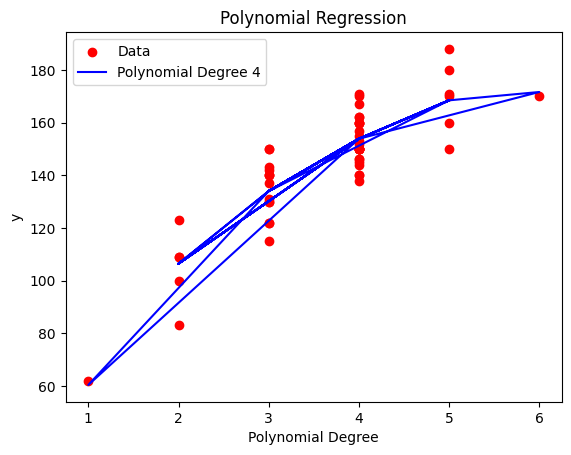

In [18]:
#1. Divide dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#2. Transform into Polynomial Features
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_train)

#3. Fit
model = LinearRegression()
model.fit(X_poly, y_train)

#4. Prediction
y_pred = model.predict(X_poly)

#5. Evaluate
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

#6. Plot the result
plt.scatter(X_train, y_train, color='red', label='Data')
plt.plot(X_train, y_pred, color='blue', label=f'Polynomial Degree {degree}')
plt.xlabel('Polynomial Degree')
plt.ylabel('y')
plt.title(f'Polynomial Regression')
plt.legend()
plt.show()

Section 2: Study of Nifty 50 index

A stock market trader wants to study the relationship between opening prices of Nifty 50 indexes. Help him choose the best regression technique to fit in the data by analysing R^2 error. Visualize the results using suitable plots.

In [19]:
data1= pd.read_csv('NIFTY 50.csv')
data1

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,31-Aug-23,19375.55,19388.20,19223.65,19253.80,562557215.0,45699.54
1,01-Sep-23,19258.15,19458.55,19255.70,19435.30,372502191.0,25962.38
2,04-Sep-23,19525.05,19545.15,19432.85,19528.80,396071122.0,24822.79
3,05-Sep-23,19564.65,19587.05,19525.75,19574.90,303958622.0,24029.89
4,06-Sep-23,19581.20,19636.45,19491.50,19611.05,512974083.0,32500.52
...,...,...,...,...,...,...,...
243,26-Aug-24,24906.10,25043.80,24874.70,25010.60,210266456.0,22166.86
244,27-Aug-24,25024.80,25073.10,24973.65,25017.75,223346636.0,26695.00
245,28-Aug-24,25030.80,25129.60,24964.65,25052.35,220419448.0,26994.19
246,29-Aug-24,25035.30,25192.90,24998.50,25151.95,353993900.0,43221.73


In [20]:
data1['Turnover (₹ Cr)']=data1['Turnover (₹ Cr)'].fillna(0)
data1['Open']=data1['Open'].fillna(0)

Mean Squared Error: 124233908.1497
R-squared: 0.1696


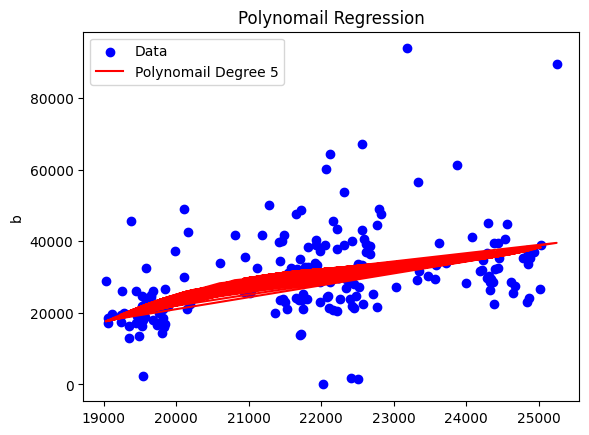

In [21]:
a= data1['Open'].values.reshape(-1,1)
b= data1['Turnover (₹ Cr)'].values

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

degree = 5
poly_features = PolynomialFeatures(degree=degree)
a_poly = poly_features.fit_transform(a_train)
model=LinearRegression()
model.fit(a_poly, b_train)
b_pred = model.predict(a_poly)
mse=mean_squared_error(b_train, b_pred)
r2=r2_score(b_train, b_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
plt.scatter(a_train, b_train, color='blue',label='Data')
plt.plot(a_train, b_pred, color='red', label=f'Polynomail Degree {degree}')
plt.title('Polynomail Regression')
plt.ylabel('b')
plt.legend()
plt.show()